## Concrete Compressive Strength Prediction

Importing necessary libraries

In [1]:
import os
import sys
import numpy as np
from numpy import array 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pydotplus
import json

## Putting data to database

In [2]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
from cassandracsv import CassandraCsv

file_path= os.path.join(os.getcwd(),'concrete_strength-token.json')
with open(file_path) as f:
    file= json.load(f)
    id= file["clientId"]
    secret= file["secret"]

cloud_config= {
        'secure_connect_bundle': os.path.join(os.getcwd(), 'secure-connect-concrete-strength.zip')
                    }
auth_provider = PlainTextAuthProvider(id, secret)
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session= cluster.connect()

row = session.execute("select release_version from system.local").one()
if row:
  print(row[0])
else:
  print("An error occurred.")

4.0.0.6816


''' cannot use - in column names, it throws syntax error. We have to use _ instead. 
 While uploading raw data use _ in the column names. After downloading the data change it back to - .
 remove the column names from the csv file while uploading
 Keep the file you want to upload in such a directory where the path name has no space in the names of folders
 had to rename class to classs'''

In [ ]:
# putting data in cassandra
#session.execute('CREATE TABLE test_csv_import (car_make text, car_model text, start_year int)')
#session.execute('COPY test_csv_import (car_make, car_model, start_year) FROM <<path of the file>> WITH DELIMITER= "," AND HEADER= TRUE')

# to get the data
#session.execute('SELECT * FROM test_csv_import') 

# putting data in cassandra
#session.execute("CREATE TABLE mushroom_test_csv (class text PRIMARY KEY,cap-shape text,cap-surface text,cap-color text,bruises text,odor text,gill-attachment text,gill-spacing text,gill-size text,gill-color text,stalk-shape text,stalk-root text,stalk-surface-above-ring text,stalk-surface-below-ring text,stalk-color-above-ring text,stalk-color-below-ring text,veil-type text,veil-color text,ring-number text,ring-type text,spore-print-color text,population text,habitat text)")
#session.execute("CREATE TABLE mushroom_test (class text,cap-shape text,cap-surface text, PRIMARY KEY (class, cap-shape))")

In [ ]:
###example of putting new table in cassandra
#qry= '''
#create table students (
#   studentID int,
#   name text,
#   age int,
#   marks int,
#   primary key(studentID)
#);'''
#session.execute(qry)

In [ ]:
#qry= '''
#drop table students
#'''
#session.execute(qry)


In [69]:
qry= '''
create table concrete_strength_csv(
   cement decimal,
   blast_furnace_slag decimal,
   fly_ash decimal,
   water decimal,
   superplasticizer decimal,
   coarse_aggregate decimal,
   fine_aggregate decimal,
   age decimal,
   concrete_compressive_strength decimal, 
   primary key(cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength)
   );'''
session.execute(qry)





In [27]:
#session.execute('DROP TABLE mushroom_csv')

In [70]:
prepared = session.prepare("""
        INSERT INTO concrete_strength_csv(cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate ,age,concrete_compressive_strength) 
        VALUES (?, ?, ?, ?, ?, ?, ?, ?,?)
        """)

In [71]:
with open(r'/config/workspace/notebooks/concrete_data.csv') as concrete_strength:
    for cols in concrete_strength:
        columns=cols.split(",")
        #pickup=datetime.datetime.strptime(columns[0],"%Y-%m-%d").date()
        #dropoff=datetime.datetime.strptime(columns[1],"%Y-%m-%d").date()
        cement=columns[0]
        blast_furnace_slag=columns[1]
        fly_ash=columns[2]
        water=columns[3]
        superplasticizer=columns[4]
        coarse_aggregate=columns[5]
        fine_aggregate=columns[6]
        age=columns[7]
        concrete_compressive_strength=columns[8]     


        session.execute(prepared, [cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate ,age,concrete_compressive_strength])

#closing the file
concrete_strength.close()

#closing Cassandra connection
#session.shutdown()

In [ ]:
'''
qry="""
COPY mushroom_csv 
(class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat) 
FROM 'C:\Users\MS\Desktop\mushrooms.csv' 
WITH DELIMITER= ','
AND HEADER= TRUE
;"""
session.execute(qry)
'''

In [ ]:
#session.execute('''COPY mushroom_csv (class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat) FROM 'C:\Users\MS\Desktop\mushrooms.csv' WITH DELIMITER=',' AND HEADER=TRUE;''')

In [68]:
# dropping all previously loaded data
#qry= '''
#drop table students
#'''
#session.execute(qry)
######################
qry= '''
drop table concrete_strength_csv
'''
session.execute(qry)

In [ ]:
'''
rows = session.execute('SELECT * FROM mushroom_csv')
for row in rows:
    print (row)
    '''

In [ ]:
result= session.execute('SELECT * FROM mushroom_csv')
CassandraCsv.export(
    result, 
    output_dir= r'D:\F Drive\ineuron\Internship\Mushroom Classification ML Project\Mushroom Classification Working Directory\notebooks\data', 
    filename='mushroom_csv', 
    separator=',', 
    with_header=True 
   )

## Reading data from database

In [3]:
session= cluster.connect('concrete_strength')
# session= cluster.connect('keyspace')

In [53]:
df = session.execute("SELECT * FROM concrete_strength_csv;")

df = pd.DataFrame([d for d in df])
df.head()

cement blast_furnace_slag fly_ash  water superplasticizer coarse_aggregate  \
0  212.0                0.0   124.8  159.0              7.8           1085.4   
1  212.0                0.0   124.8  159.0              7.8           1085.4   
2  212.0                0.0   124.8  159.0              7.8           1085.4   
3  212.0                0.0   124.8  159.0              7.8           1085.4   
4  212.0                0.0   124.8  159.0              7.8           1085.4   

  fine_aggregate  age concrete_compressive_strength  
0          799.5    3                         19.52  
1          799.5   14                         31.35  
2          799.5   28                         38.50  
3          799.5   56                         45.08  
4          799.5  100                         47.82

In [54]:
df.shape

(1004, 9)

In [55]:
df.columns=['cement','blast_furnace_slag','fly_ash','water','superplasticizer','coarse_aggregate','fine_aggregate' ,'age','concrete_compressive_strength']

# Preliminary data exploration

In [6]:
df.info() # none of the columns are numerical. All columns are catagorical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   cement                         1004 non-null   object
 1   blast_furnace_slag             1004 non-null   object
 2   fly_ash                        1004 non-null   object
 3   water                          1004 non-null   object
 4   superplasticizer               1004 non-null   object
 5   coarse_aggregate               1004 non-null   object
 6   fine_aggregate                 1004 non-null   object
 7   age                            1004 non-null   object
 8   concrete_compressive_strength  1004 non-null   object
dtypes: object(9)
memory usage: 70.7+ KB


In [60]:
df= df.astype(float)

In [8]:
df.describe()

cement  blast_furnace_slag      fly_ash        water  \
count  1004.000000         1004.000000  1004.000000  1004.000000   
mean    278.371016           72.115239    55.591633   182.095319   
std     104.069221           86.183707    64.216006    21.340548   
min     102.000000            0.000000     0.000000   121.800000   
25%     190.700000            0.000000     0.000000   166.600000   
50%     264.750000           20.000000     0.000000   185.700000   
75%     343.750000          142.500000   118.300000   192.900000   
max     540.000000          359.400000   200.100000   247.000000   

       superplasticizer  coarse_aggregate  fine_aggregate          age  \
count       1004.000000       1004.000000     1004.000000  1004.000000   
mean           6.036753        974.311454      772.784562    45.874502   
std            5.921865         77.590641       80.322418    63.763961   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      726.775000     7.000000   
50%            6.100000        968.000000      780.000000    28.000000   
75%           10.000000       1030.250000      822.650000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

       concrete_compressive_strength  
count                    1004.000000  
mean                       35.205817  
std                        16.231512  
min                         2.330000  
25%                        23.520000  
50%                        33.780000  
75%                        44.862500  
max                        82.600000

In [9]:
## check for duplicated records
df.duplicated().sum()

0

In [10]:
# Checking for missing values
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

This shows that there are no missing values in the dataset. 

In [11]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap

Loading BokehJS ...

In [12]:
%matplotlib inline
AV = AutoViz_Class()
plt.figure(figsize=[15,10])
dft = AV.AutoViz(
    "",
    sep="",
    depVar="concrete_compressive_strength",
    dfte=df,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="bokeh",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)
plt.show()

NameError: name 'AutoViz_Class' is not defined

### treating outliers

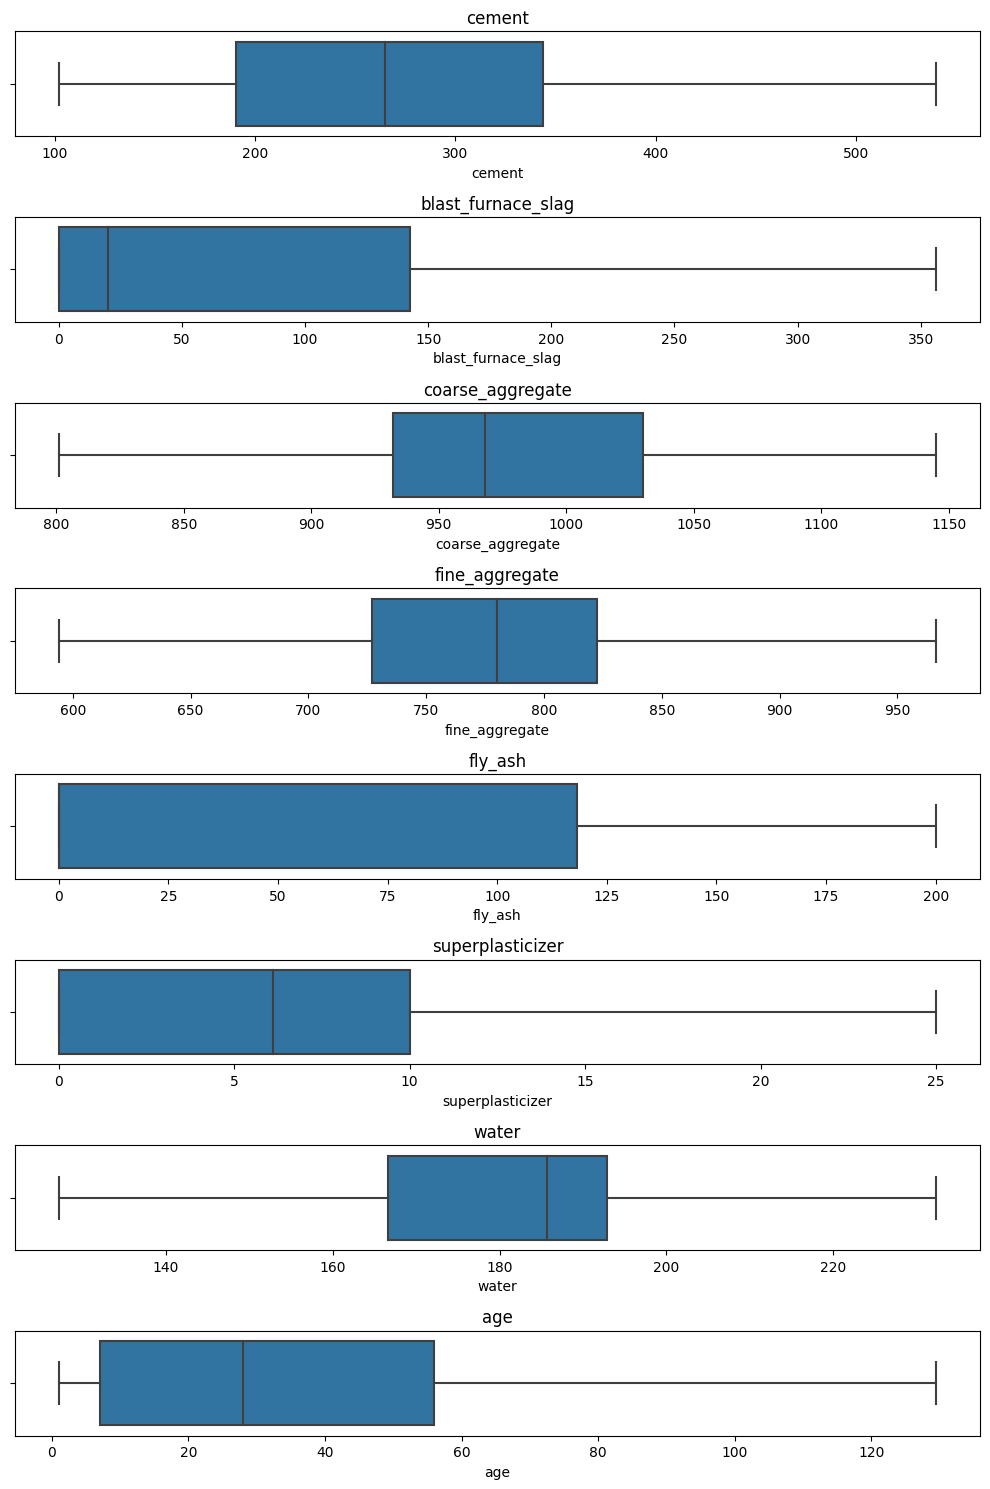

In [13]:
from feature_engine.outliers import Winsorizer

# Select the features to apply Winsorization
features = ['cement', 'blast_furnace_slag', 'coarse_aggregate', 'fine_aggregate', 'fly_ash', 'superplasticizer', 'water', 'age']

# Create the Winsorizer transformer
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=features)

# Fit and transform the data
df[features] = winsorizer.fit_transform(df[features])

# Set the size of the figure
plt.figure(figsize=(10, 15))

# For each feature, create a subplot and draw a boxplot
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.boxplot(x=df[feature])
    plt.title(feature)

# Display the plot
plt.tight_layout()
plt.show() 

In [14]:
# check outliers in each feature 

features = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'age']

# Calculate the lower and upper fences for outliers
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Count the number of outliers below the lower fence
    lower_outliers_count = df[df[feature] < lower_fence].shape[0]
    
    # Count the number of outliers above the upper fence
    upper_outliers_count = df[df[feature] > upper_fence].shape[0]

    print("Feature:", feature)
    print("Number of Lower Outliers:", lower_outliers_count)
    print("Number of Upper Outliers:", upper_outliers_count)
    print("-------------------------------------------")#

Feature: cement
Number of Lower Outliers: 0
Number of Upper Outliers: 0
-------------------------------------------
Feature: blast_furnace_slag
Number of Lower Outliers: 0
Number of Upper Outliers: 0
-------------------------------------------
Feature: fly_ash
Number of Lower Outliers: 0
Number of Upper Outliers: 0
-------------------------------------------
Feature: water
Number of Lower Outliers: 0
Number of Upper Outliers: 0
-------------------------------------------
Feature: superplasticizer
Number of Lower Outliers: 0
Number of Upper Outliers: 0
-------------------------------------------
Feature: coarse_aggregate
Number of Lower Outliers: 0
Number of Upper Outliers: 0
-------------------------------------------
Feature: age
Number of Lower Outliers: 0
Number of Upper Outliers: 0
-------------------------------------------


Description:
For each column, it first computes the Z-score of each value in the column, relative to the column mean and standard deviation. <br />
It then takes the absolute Z-score because the direction does not matter, only if it is below the threshold. <br />
all(axis=1) ensures that for each row, all column satisfy the constraint. <br />
Finally, the result of this condition is used to index the dataframe.

In [15]:
from scipy import stats
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0      212.0                 0.0    124.8  159.0               7.8   
1      212.0                 0.0    124.8  159.0               7.8   
2      212.0                 0.0    124.8  159.0               7.8   
3      212.0                 0.0    124.8  159.0               7.8   
4      212.0                 0.0    124.8  159.0               7.8   
...      ...                 ...      ...    ...               ...   
999    322.0                 0.0      0.0  203.0               0.0   
1000   322.0                 0.0    116.0  196.0              10.0   
1001   322.0               149.0      0.0  186.0               8.0   
1002   355.0                19.0     97.0  145.0              12.3   
1003   355.0                19.0     97.0  145.0              13.1   

      coarse_aggregate  fine_aggregate    age  concrete_compressive_strength  
0               1085.4           799.5    3.0                          19.52  
1               1085.4           799.5   14.0                          31.35  
2               1085.4           799.5   28.0                          38.50  
3               1085.4           799.5   56.0                          45.08  
4               1085.4           799.5  100.0                          47.82  
...                ...             ...    ...                            ...  
999              974.0           800.0  129.5                          29.59  
1000             818.0           813.0   28.0                          31.18  
1001             951.0           709.0   28.0                          52.42  
1002             967.0           871.0   28.0                          55.45  
1003             967.0           871.0   28.0                          44.03  

[985 rows x 9 columns]

In [16]:
# check outliers in each feature 

features = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'age']

# Calculate the lower and upper fences for outliers
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Count the number of outliers below the lower fence
    lower_outliers_count = df[df[feature] < lower_fence].shape[0]
    
    # Count the number of outliers above the upper fence
    upper_outliers_count = df[df[feature] > upper_fence].shape[0]

    print("Feature:", feature)
    print("Number of Lower Outliers:", lower_outliers_count)
    print("Number of Upper Outliers:", upper_outliers_count)
    print("-------------------------------------------")#

Feature: cement
Number of Lower Outliers: 0
Number of Upper Outliers: 0
-------------------------------------------
Feature: blast_furnace_slag
Number of Lower Outliers: 0
Number of Upper Outliers: 0
-------------------------------------------
Feature: fly_ash
Number of Lower Outliers: 0
Number of Upper Outliers: 0
-------------------------------------------
Feature: water
Number of Lower Outliers: 0
Number of Upper Outliers: 0
-------------------------------------------
Feature: superplasticizer
Number of Lower Outliers: 0
Number of Upper Outliers: 0
-------------------------------------------
Feature: coarse_aggregate
Number of Lower Outliers: 0
Number of Upper Outliers: 0
-------------------------------------------
Feature: age
Number of Lower Outliers: 0
Number of Upper Outliers: 0
-------------------------------------------


In [36]:
from ydata_profiling import ProfileReport as pr
profile_report = pr(df)
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Feature: cement
Test statistic = 0.9556061029434204
p-value = 7.152112610810327e-17
Data does not appear to be normally distributed.

Feature: blast_furnace_slag
Test statistic = 0.8049948215484619
p-value = 4.245296011284768e-33
Data does not appear to be normally distributed.

Feature: fly_ash
Test statistic = 0.7690081000328064
p-value = 2.523453180555953e-35
Data does not appear to be normally distributed.

Feature: water
Test statistic = 0.9774774312973022
p-value = 2.3295157469682692e-11
Data does not appear to be normally distributed.

Feature: superplasticizer
Test statistic = 0.8709371089935303
p-value = 5.428830105055698e-28
Data does not appear to be normally distributed.

Feature: coarse_aggregate
Test statistic = 0.9833393096923828
p-value = 2.6934070529449627e-09
Data does not appear to be normally distributed.

Feature: fine_aggregate
Test statistic = 0.9796252846717834
p-value = 1.200576860149738e-10
Data does not appear to be normally distributed.

Feature: age
Test st

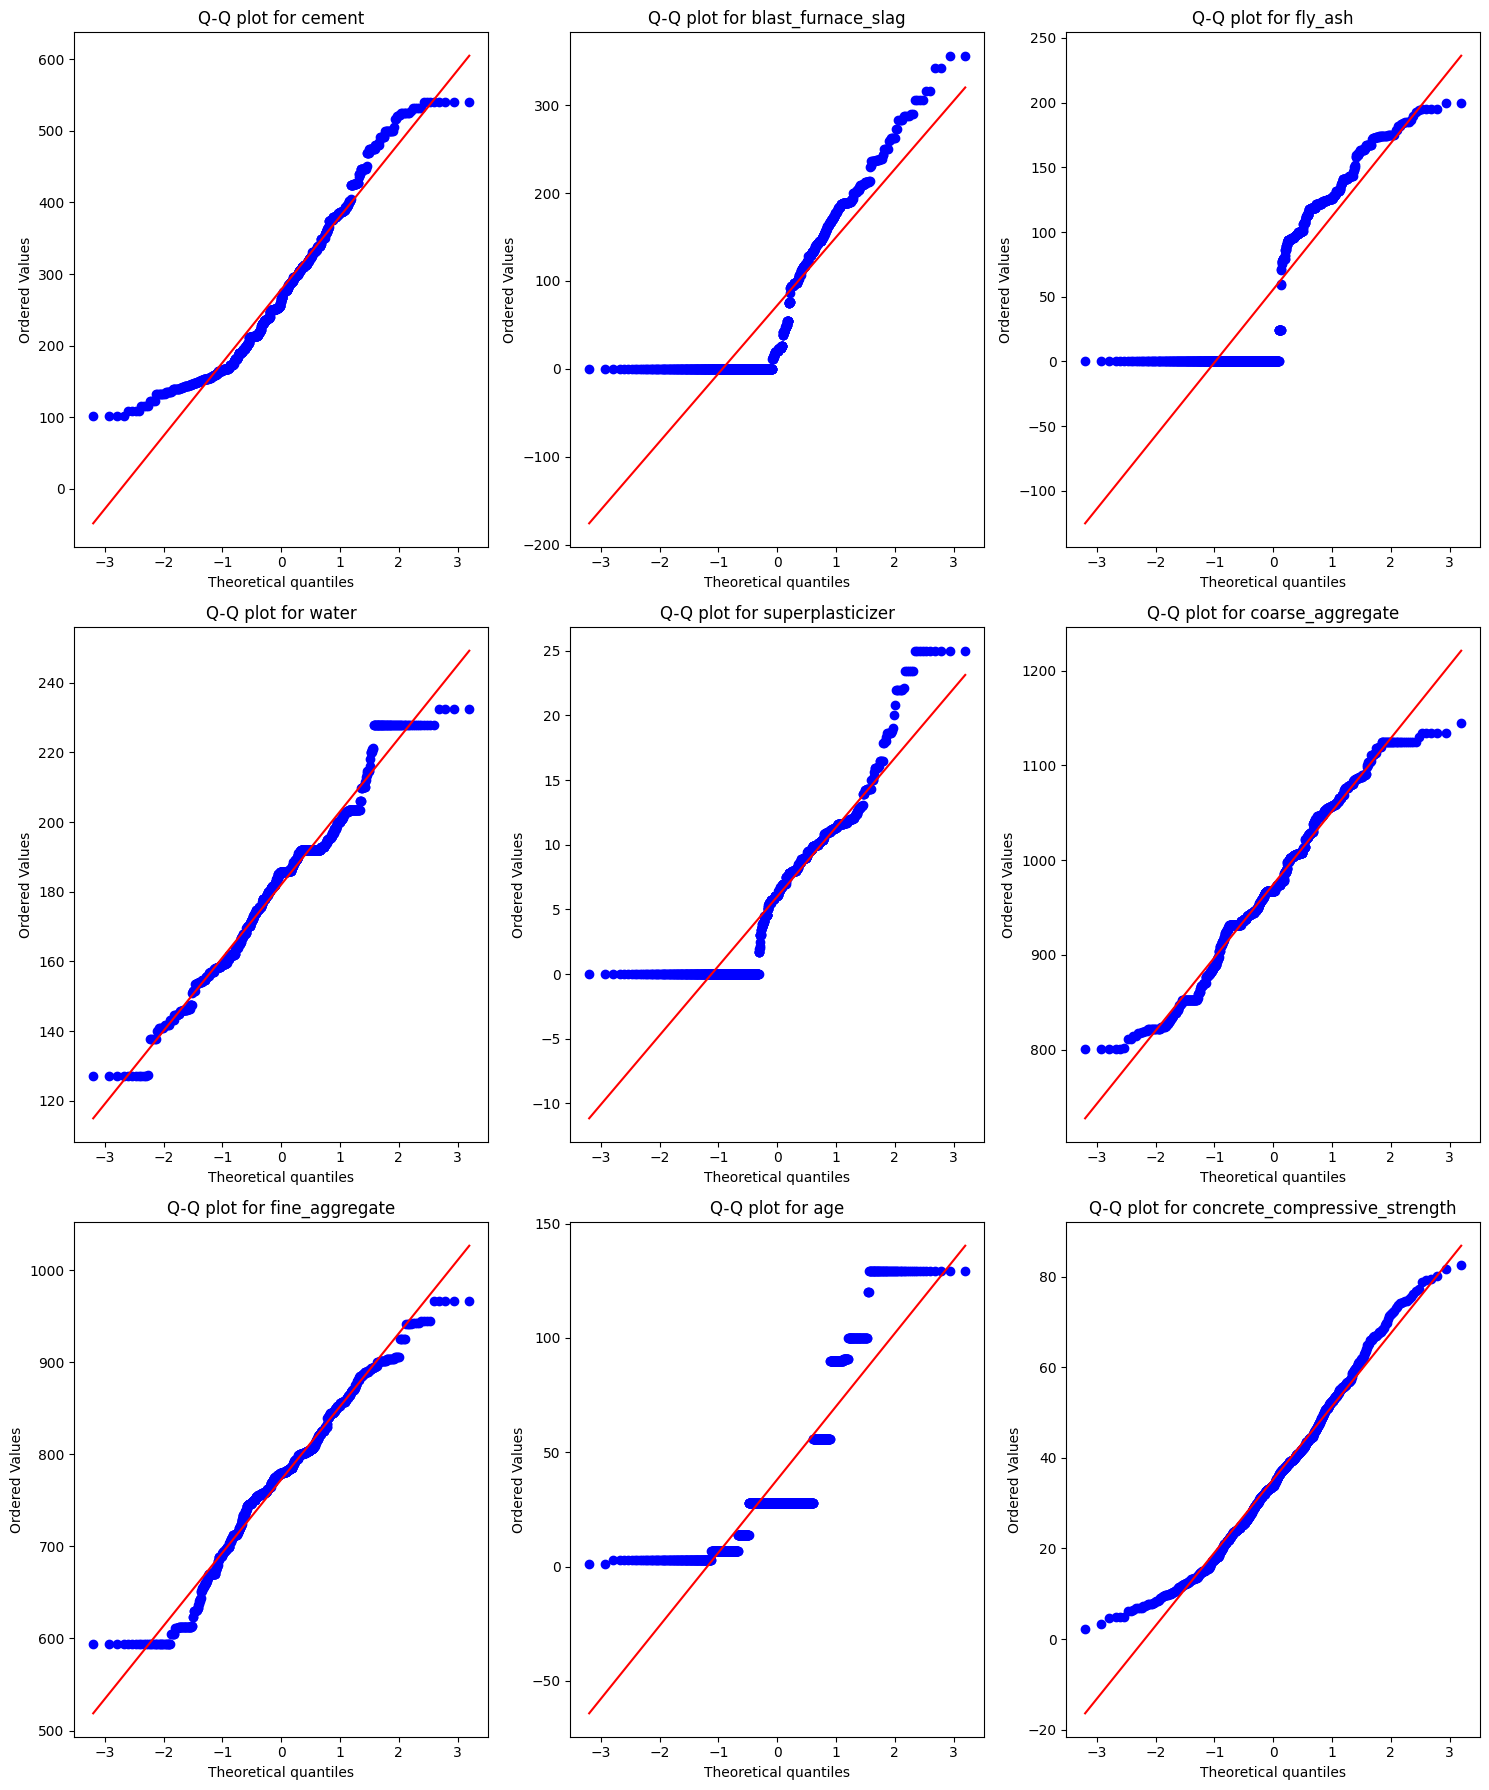

In [43]:
features = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 
            'coarse_aggregate', 'fine_aggregate', 'age', 'concrete_compressive_strength']

num_plots = len(features)
num_rows = num_plots // 3 + num_plots % 3

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 6 * num_rows))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    data = df[feature]
    
    # perform Shapiro-Wilk test
    stat, p = stats.shapiro(data)
    
    # print test statistic and p-value
    print(f'Feature: {feature}')
    print('Test statistic =', stat)
    print('p-value =', p)
    
    if p > 0.05:
        print('Data appears to be normally distributed.\n')
    else:
        print('Data does not appear to be normally distributed.\n')
    # generate Q-Q plot in subplot
    stats.probplot(data, plot=ax)
    ax.set_title('Q-Q plot for ' + feature)

# Remove any unused subplots
if num_plots % 3 != 0:
    for j in range(num_plots % 3, 3):
        fig.delaxes(axes[num_rows - 1, j])

plt.tight_layout()
plt.show()

Observations
After examining the data, several intriguing observations can be drawn regarding the distributions of the variables:

Cement: The distribution appears to be almost normal, which indicates a balanced presence of this ingredient in the mixture across the dataset.

Slag: The distribution of slag seems to exhibit three distinct peaks, or Gaussians, suggesting the presence of three groups within this variable. Additionally, the data is right-skewed, implying a significant number of higher-than-average values.

Ash: The ash component also shows evidence of bimodality, with two distinct Gaussians, and is right-skewed. This suggests a substantial amount of observations have higher ash content.

Water: The distribution of water showcases three Gaussians and is slightly left-skewed, indicating that the data contains a considerable number of observations with less water than the average.

Superplastic: The distribution of this variable shows two clear Gaussians and is right-skewed, meaning there is a significant amount of mixtures with higher superplastic content.

Coarse Aggregate: This variable displays three Gaussians, suggesting three groupings within the coarse aggregate content. The distribution appears to be approximately normal.

Fine Aggregate: The fine aggregate content in the mixtures seems to follow a nearly normal distribution with a slight inclination towards two Gaussians, indicating a balanced spread of this variable.

Age: The age variable is distinctly right-skewed, pointing towards a considerable number of observations having more days since the initial mixing. This variable also shows evidence of multiple Gaussians, suggesting the presence of various groups within the dataset based on the age.

These observations are instrumental in understanding the underlying structure and relationships within our data, informing our data preprocessing and model building steps.

Null Hypothesis (H0): The hypothesis that there is no significant difference or effect. In statistics, we usually assume the null hypothesis is true until we have enough evidence to reject it.

Alternative Hypothesis (Ha or H1): The hypothesis that there is a significant difference or effect. This is the hypothesis we are testing for, and it's considered as an alternative to the null hypothesis.

In the context of the Shapiro-Wilk test:

H0: "The data is drawn from a normal distribution."

Ha: "The data is not drawn from a normal distribution."

We use statistical tests to determine whether to reject the null hypothesis in favor of the alternative hypothesis. If the p-value is less than a chosen significance level (commonly 0.05), we reject the null hypothesis and conclude that the data is not normally distributed.

### Applying log transforamtion

In [44]:
# Specify the features to apply log transformation
features = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age'
       ]

# Apply log transformation to the selected features
for feature in features:
    df[feature] = np.log1p(df[feature])

Feature: cement
Test statistic = 0.9798575043678284
p-value = 1.44268000323855e-10
Data does not appear to be normally distributed.

Feature: blast_furnace_slag
Test statistic = 0.7423909306526184
p-value = 8.479812594444604e-37
Data does not appear to be normally distributed.

Feature: fly_ash
Test statistic = 0.6786186695098877
p-value = 6.9670317568686985e-40
Data does not appear to be normally distributed.

Feature: water
Test statistic = 0.97360759973526
p-value = 1.5384748596608544e-12
Data does not appear to be normally distributed.

Feature: superplasticizer
Test statistic = 0.7863040566444397
p-value = 2.718609177418639e-34
Data does not appear to be normally distributed.

Feature: coarse_aggregate
Test statistic = 0.9798258543014526
p-value = 1.4069352627377185e-10
Data does not appear to be normally distributed.

Feature: fine_aggregate
Test statistic = 0.9639225602149963
p-value = 4.652960349372896e-15
Data does not appear to be normally distributed.

Feature: age
Test stat

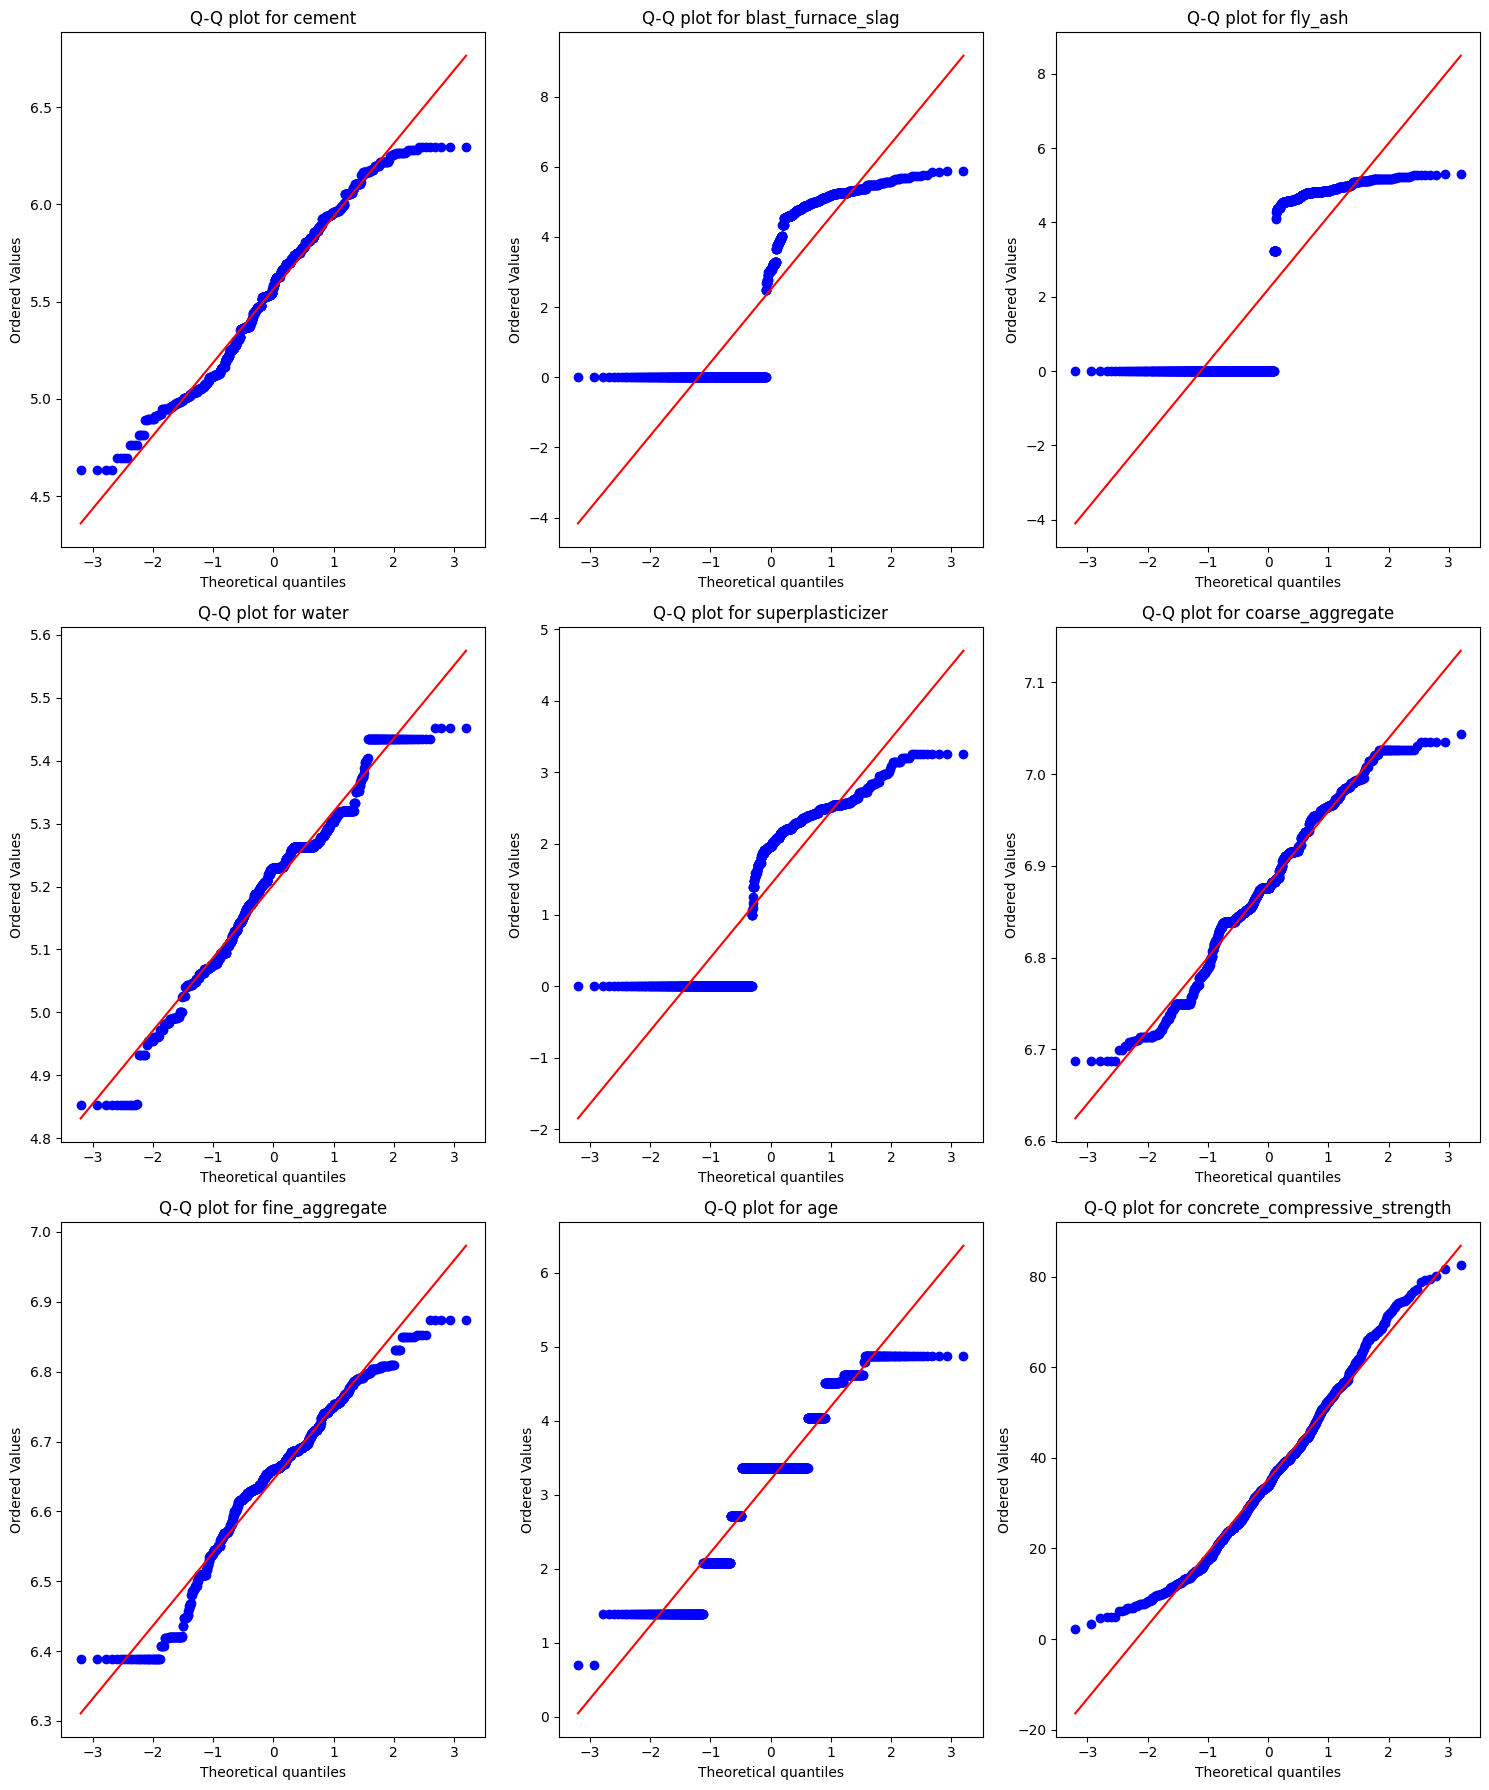

In [48]:
features = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 
            'coarse_aggregate', 'fine_aggregate', 'age', 'concrete_compressive_strength']

num_plots = len(features)
num_rows = num_plots // 3 + num_plots % 3

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 6 * num_rows))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    data = df[feature]
    
    # perform Shapiro-Wilk test
    stat, p = stats.shapiro(data)
    
    # print test statistic and p-value
    print(f'Feature: {feature}')
    print('Test statistic =', stat)
    print('p-value =', p)
    
    if p > 0.05:
        print('Data appears to be normally distributed.\n')
    else:
        print('Data does not appear to be normally distributed.\n')
    # generate Q-Q plot in subplot
    stats.probplot(data, plot=ax)
    ax.set_title('Q-Q plot for ' + feature)

# Remove any unused subplots
if num_plots % 3 != 0:
    for j in range(num_plots % 3, 3):
        fig.delaxes(axes[num_rows - 1, j])

plt.tight_layout()
plt.show()